# HDDM WORKSHOP 
## (Alexander Fengler, May 2022)

## COLAB Installation Instructions (optional)

In [ ]:
# !pip install cython
# !pip install pymc # if there are problems --> usually here
# !pip install git+https://github.com/hddm-devs/kabuki
# !pip install git+https://github.com/hddm-devs/hddm
# !pip install torch torchvision torchaudio # optional

## Basic Preparation

In [1]:
# MODULE IMPORTS ----

from copy import deepcopy

# warning settings
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

# HDDM
import hddm
from hddm.simulators.hddm_dataset_generators import simulator_h_c

### Initial Examples (most useful functions)

### Data Simulators

#### The `simulator_h_c()` function

This function is useful if you want to create complex datasets (e.g. for parameter recovery studies). To check specifics you can use the `help()` function.

##### Simple example

In [2]:
# Simulate some data

# 'ddm_hddm_base' specifies usage of the basic ddm simulator
# recent changes to hddm allow many more models to be fit, necessitating
# explicit naming.
model = "ddm_hddm_base"

n_samples = 1000  # number of samples (trials) the simulated data should contain
n_subjects = 1

data, parameter_dict = simulator_h_c(
    n_subjects=n_subjects,
    n_trials_per_subject=n_samples,
    model=model,
    p_outlier=0.00,
    conditions=None,
    depends_on=None,
    regression_models=None,
    regression_covariates=None,
    group_only_regressors=False,
    group_only=None,
    fixed_at_default=None,
)

In [3]:
data

,rt,response,subj_idx,v,a,z,t
0,2.611617,1.0,0,2.539506,2.432656,0.453724,2.203619
1,3.078611,1.0,0,2.539506,2.432656,0.453724,2.203619
2,2.529618,1.0,0,2.539506,2.432656,0.453724,2.203619
3,2.592617,1.0,0,2.539506,2.432656,0.453724,2.203619
4,2.960612,1.0,0,2.539506,2.432656,0.453724,2.203619
...,...,...,...,...,...,...,...
995,2.770615,1.0,0,2.539506,2.432656,0.453724,2.203619
996,2.909613,1.0,0,2.539506,2.432656,0.453724,2.203619
997,2.767615,1.0,0,2.539506,2.432656,0.453724,2.203619
998,2.432619,1.0,0,2.539506,2.432656,0.453724,2.203619


In [4]:
# Generating parameters
parameter_dict

{'t': 2.2036186370169966,
 'z': 0.45372422396848033,
 'v': 2.5395057155797898,
 'a': 2.432655703260449}

##### Complex example

In [6]:
# Simulate some data

# 'ddm_hddm_base' specifies usage of the basic ddm simulator
# recent changes to hddm allow many more models to be fit, necessitating
# explicit naming.
model = "ddm_hddm_base"

n_samples = 1000  # number of samples (trials) the simulated data should contain
n_subjects = 10

data, parameter_dict = simulator_h_c(
    n_subjects=n_subjects,
    n_trials_per_subject=n_samples,
    model=model,
    p_outlier=0.00,
    conditions={"my_condition": ["high", "low"]},
    depends_on={"v": ["my_condition"]},
    regression_models=None,
    regression_covariates=None,
    group_only_regressors=False,
    group_only=None,
    fixed_at_default=None,
)

In [7]:
data

,rt,response,subj_idx,my_condition,v,a,z,t
0,1.969172,1.0,0,high,0.871484,2.269515,0.562665,0.749171
1,1.414166,1.0,0,high,0.871484,2.269515,0.562665,0.749171
2,1.240168,1.0,0,high,0.871484,2.269515,0.562665,0.749171
3,1.334167,1.0,0,high,0.871484,2.269515,0.562665,0.749171
4,1.184169,1.0,0,high,0.871484,2.269515,0.562665,0.749171
...,...,...,...,...,...,...,...,...
19995,0.691679,1.0,9,low,1.175099,3.082947,0.465346,0.252681
19996,1.638690,1.0,9,low,1.175099,3.082947,0.465346,0.252681
19997,0.469681,1.0,9,low,1.175099,3.082947,0.465346,0.252681
19998,0.892676,1.0,9,low,1.175099,3.082947,0.465346,0.252681


In [8]:
# Generating parameters
parameter_dict

{'z': 0.5643101021992838,
 'z_std': 0.06360677869943576,
 'a': 2.7837102262781688,
 'a_std': 0.3015571727553035,
 't': 0.4635284771831927,
 't_std': 0.36772697267380816,
 'v(high)': 0.739605342236667,
 'v(low)': 1.2056254718355417,
 'v_std': 0.1656452889266339,
 'z_subj.0': 0.5626650388708693,
 'a_subj.0': 2.2695148013618454,
 't_subj.0': 0.749170924264752,
 'v_subj(high).0': 0.8714837960021933,
 'z_subj.1': 0.5179780958467182,
 'a_subj.1': 2.8261610860934203,
 't_subj.1': 0.5663210204665238,
 'v_subj(high).1': 0.9168348611044683,
 'z_subj.2': 0.5852050980540738,
 'a_subj.2': 3.244246589088206,
 't_subj.2': 1.0708398724741133,
 'v_subj(high).2': 0.6624347419371899,
 'z_subj.3': 0.598384195666198,
 'a_subj.3': 2.369505820943145,
 't_subj.3': 0.05060549118480173,
 'v_subj(high).3': 0.6892129036345486,
 'z_subj.4': 0.5426574614398145,
 'a_subj.4': 2.8428734214486675,
 't_subj.4': 0.9275862269918855,
 'v_subj(high).4': 0.9580725201560745,
 'z_subj.5': 0.6003303459317147,
 'a_subj.5': 2.856

#### The `simulator()` function

This function is useful for low level access to the simulators and full flexbility.
The `simulator()` function provides a `tuple`, with the following elements as output.

- `[0]` provides the *reaction times*
- `[1]` provides the *choices*
- `[2]` provides a bunch of *metadata*

In [10]:
# Get some default parameters

# The 'model_config' dictionary contains essential information about all models
# currently included in HDDM
params = hddm.model_config.model_config["ddm_hddm_base"]["params_default"]
params[3] = 0.5
sim_out = hddm.simulators.simulator(theta=params, model=model, n_samples=n_samples)

theta = np.zeros((n_samples, 5))
theta[:, 0] = sim_out[2]["v"][0]
theta[:, 1] = sim_out[2]["a"][0]
theta[:, 2] = sim_out[2]["z"][0]
theta[:, 3] = sim_out[2]["t"][0]
theta[:, 4] = 0

data = pd.DataFrame(
    np.concatenate([(sim_out[0]), (sim_out[1]), theta], axis=1),
    columns=["rt", "response", "v", "a", "z", "t", "subj_idx"],
)
data["subj_idx"] = data["subj_idx"].apply(str)

In [11]:
sim_out[2]

{'v': array([0.], dtype=float32),
 'a': array([2.], dtype=float32),
 'z': array([0.5], dtype=float32),
 't': array([0.5], dtype=float32),
 's': 1.0,
 'delta_t': 0.0010000000474974513,
 'max_t': 20.0,
 'n_samples': 1000,
 'simulator': 'ddm',
 'boundary_fun_type': 'constant',
 'possible_choices': [-1, 1],
 'trajectory': array([[   1.       ],
        [   1.0387664],
        [   1.0491449],
        ...,
        [-999.       ],
        [-999.       ],
        [-999.       ]], dtype=float32),
 'model': 'ddm_hddm_base'}

In [12]:
# Same format as data above
data

,rt,response,v,a,z,t,subj_idx
0,1.038997,-1.0,0.0,2.0,0.5,0.5,0.0
1,0.669000,-1.0,0.0,2.0,0.5,0.5,0.0
2,0.694000,-1.0,0.0,2.0,0.5,0.5,0.0
3,0.686000,-1.0,0.0,2.0,0.5,0.5,0.0
4,1.449991,1.0,0.0,2.0,0.5,0.5,0.0
...,...,...,...,...,...,...,...
995,0.810000,-1.0,0.0,2.0,0.5,0.5,0.0
996,2.962004,1.0,0.0,2.0,0.5,0.5,0.0
997,0.920998,1.0,0.0,2.0,0.5,0.5,0.0
998,0.946998,-1.0,0.0,2.0,0.5,0.5,0.0


##### NOTE:

In the `hddm.generate` and `hddm.simulators.hddm_dataset_generators` modules you will find yet more options for *simulator* functions.

### Plot from Data

#### The `plot_from_data()` function

This function can be used to illustrate various aspects of a dataset.
The example below shows a version that includes a *cartoon of the generative model*,
(this can be very useful e.g. in investigating model behavior across parameter settings)

##### SIMPLE

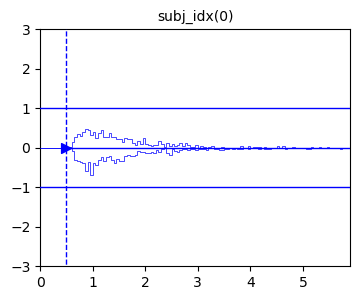

In [13]:
# Plot the dataset
hddm.plotting.plot_from_data(
    df=data,
    generative_model="ddm_hddm_base",
    columns=1,
    groupby=["subj_idx"],
    figsize=(4, 3),
    value_range=np.arange(0, 6, 0.1),
    plot_func=hddm.plotting._plot_func_model,
    **{
        "alpha": 1.0,
        "ylim": 3,
        "hist_bottom": 0.0,
        "add_data_rts": True,
        "add_data_model": True,
        "add_data_model_markertype_starting_point": ">",
    }
)
plt.show()

We can also just show the *reaction times* and drop the *model cartoon*.

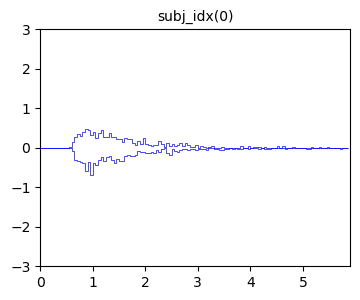

In [14]:
# Plot the dataset
hddm.plotting.plot_from_data(
    df=data,
    # generative_model = 'ddm_hddm_base',
    columns=1,
    groupby=["subj_idx"],
    figsize=(4, 3),
    value_range=np.arange(0, 6, 0.1),
    plot_func=hddm.plotting._plot_func_model,
    **{
        "alpha": 1.0,
        "ylim": 3,
        "add_data_rts": True,
        "hist_bottom": 0.0,
        "add_data_model": False,  # NOTE WE DO NOT SHOW THE MODEL NOW
    }
)
plt.show()

##### COMPLEX

In [15]:
# Simulate some data

# 'ddm_hddm_base' specifies usage of the basic ddm simulator
# recent changes to hddm allow many more models to be fit, necessitating
# explicit naming.
model = "ddm_hddm_base"

n_samples = 1000  # number of samples (trials) the simulated data should contain
n_subjects = 10

data, parameter_dict = simulator_h_c(
    n_subjects=n_subjects,
    n_trials_per_subject=n_samples,
    model=model,
    p_outlier=0.00,
    conditions={"condition": ["high", "low"]},
    depends_on={"v": ["condition"]},
    regression_models=None,
    regression_covariates=None,
    group_only_regressors=False,
    group_only=None,
    fixed_at_default=None,
)

In [16]:
data

,rt,response,subj_idx,condition,v,a,z,t
0,2.922749,0.0,0,high,-1.577771,1.332924,0.673457,1.909757
1,2.142757,0.0,0,high,-1.577771,1.332924,0.673457,1.909757
2,2.343755,0.0,0,high,-1.577771,1.332924,0.673457,1.909757
3,2.368755,0.0,0,high,-1.577771,1.332924,0.673457,1.909757
4,1.990757,0.0,0,high,-1.577771,1.332924,0.673457,1.909757
...,...,...,...,...,...,...,...,...
19995,2.692598,1.0,9,low,1.637832,2.318110,0.634928,1.527600
19996,2.482591,1.0,9,low,1.637832,2.318110,0.634928,1.527600
19997,1.980597,1.0,9,low,1.637832,2.318110,0.634928,1.527600
19998,1.700600,1.0,9,low,1.637832,2.318110,0.634928,1.527600


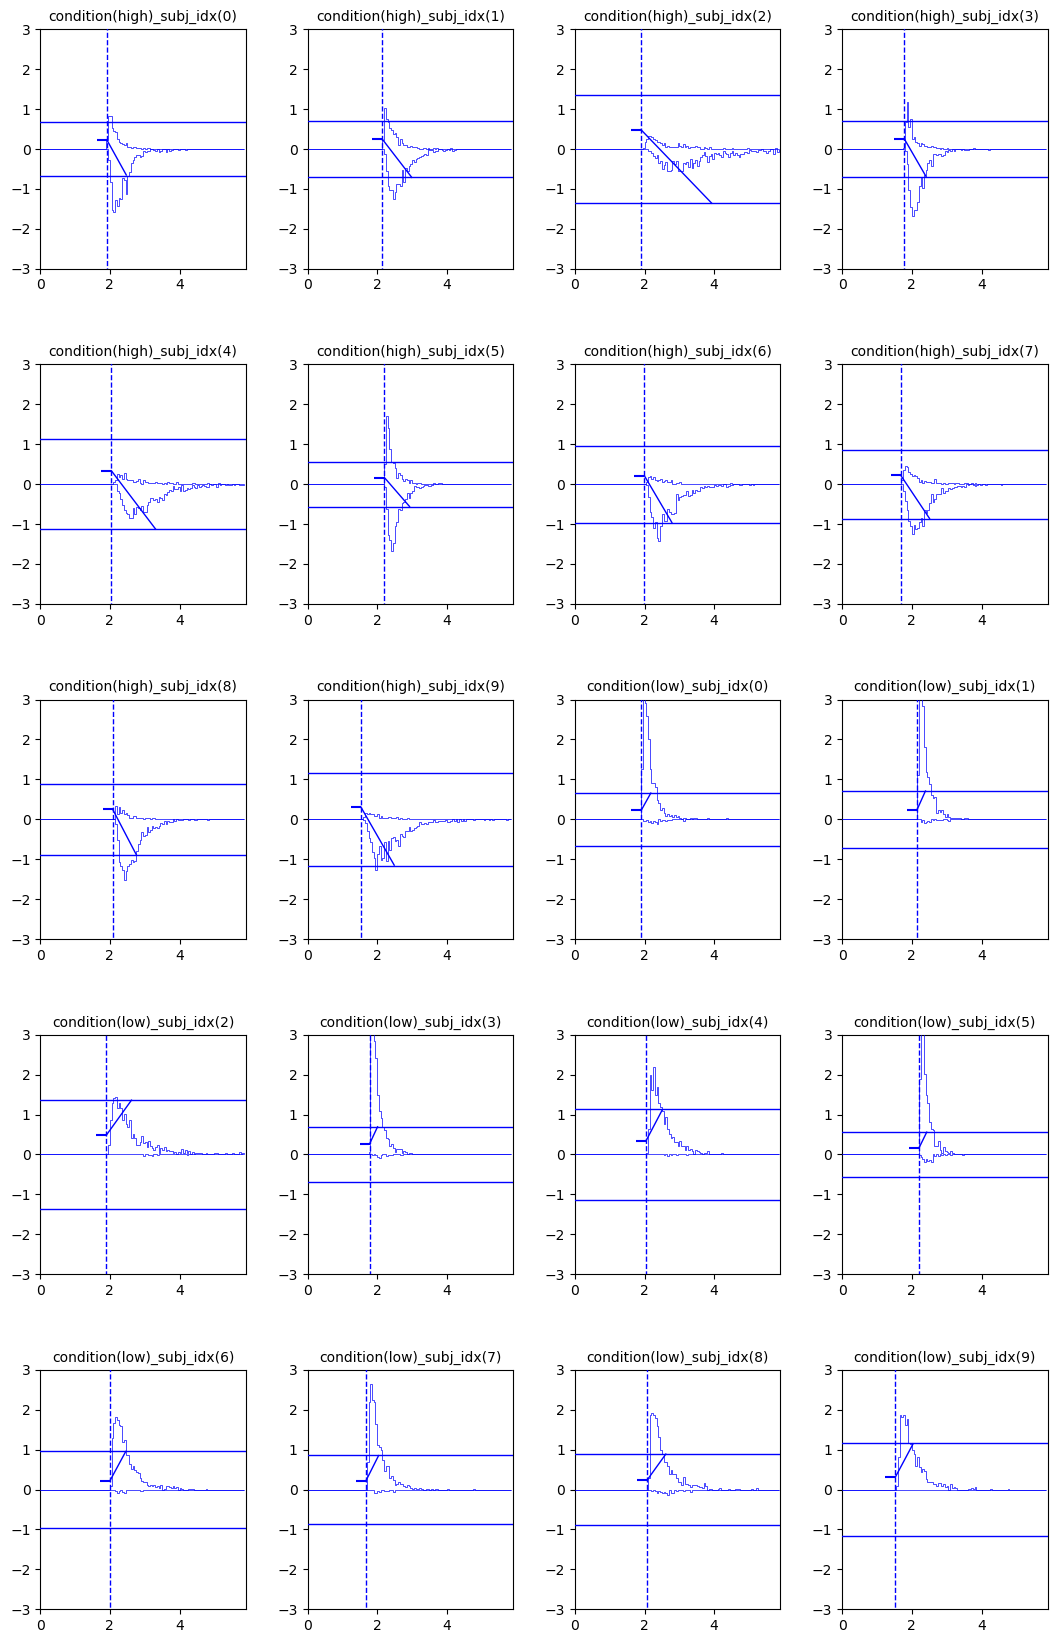

In [18]:
# Plot the dataset
hddm.plotting.plot_from_data(
    df=data,
    generative_model="ddm_hddm_base",
    columns=4,
    groupby=["condition", "subj_idx"],
    figsize=(13, 20),
    value_range=np.arange(0, 6, 0.1),
    plot_func=hddm.plotting._plot_func_model,
    **{
        "alpha": 1.0,
        "ylim": 3,
        "hist_bottom": 0,  # bottom of upper histogram
        "add_data_rts": True,
        "add_data_model": True,
    }
)
plt.show()

##### NOTE

Via the `**kwargs` you have many styling options with this plot. 

### A First Model Fit

Let's generate some simple data again.

In [19]:
# Get some default parameters

# The 'model_config' dictionary contains essential information about all models
# currently included in HDDM
params = hddm.model_config.model_config["ddm_hddm_base"]["params_default"]
params[3] = 0.5
sim_out = hddm.simulators.simulator(theta=params, model=model, n_samples=n_samples)

theta = np.zeros((n_samples, 5))
theta[:, 0] = sim_out[2]["v"][0]
theta[:, 1] = sim_out[2]["a"][0]
theta[:, 2] = sim_out[2]["z"][0]
theta[:, 3] = sim_out[2]["t"][0]
theta[:, 4] = 0

data = pd.DataFrame(
    np.concatenate([(sim_out[0]), (sim_out[1]), theta], axis=1),
    columns=["rt", "response", "v", "a", "z", "t", "subj_idx"],
)
data["subj_idx"] = data["subj_idx"].apply(str)

In [20]:
# Define the HDDM model
includes = hddm.model_config.model_config[model]["hddm_include"]
n_models = 2
hddm_models = []

for i in range(n_models):
    hddm_models.append(
        hddm.HDDM(
            data,
            informative=True,
            is_group_model=False,
            include=["v", "a", "z", "t"],
            p_outlier=0,
        )
    )

No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm


In [21]:
# Sample
nmcmc = 2000

for i in range(n_models):
    print(i)
    hddm_models[i].sample(nmcmc, burn=1000)

0
 [-----------------100%-----------------] 2000 of 2000 complete in 21.2 sec1
 [-----------------100%-----------------] 2000 of 2000 complete in 20.0 sec

##### NOTE

You can parallelize the model fits using the `multiprocessing` library for example.
See the template below:

```
# imports ...
from functools import partial
from multiprocessing import Pool
import psutil
# etc. etc.

def run_model(chain_id, data, x, y, z):
    import hddm

    # Process x,y,z ...
  
    # Define Model
    model = hddm.HDDM(data,
              informative = x,
              is_group_model = True,
              include = y,
              p_outlier = z)
    
    # Sample
    model.sample(1000, burn = 500, dbname = 'db_name_' + str(chain_id) + '.db', db = 'pickle')
    
    # Save
    model.save('my_model_' + str(chain_id) + '.pickle')
    
    return 0
    
if __name__ == "__main__":
    n_cpus = psutil.cpu_count(logical = False)
    n_chains = ...
    data = ...
    x = ...
    y = ...
    z = ...
    
    run_model_prepped = partial(run_model, data = data, x = x, y = y, z = z)
    
    with Pool(processes = n_cpus) as pool:
        pool_out = pool.map(run_model_prepped, [1, 2, ... , n_chains])
    
    print("Finished")
```


### Reporting HDDM results

#### Posterior Statistics

In [20]:
# Posterior Means
hddm_models[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.09666,0.030653,2.037259,2.075024,2.095271,2.11635,2.160866,0.001213
v,-0.052051,0.034457,-0.11563,-0.075865,-0.052081,-0.029168,0.014518,0.001297
t,0.484771,0.008865,0.466659,0.478512,0.485222,0.491326,0.500522,0.000372
z,0.493734,0.010371,0.474054,0.486568,0.49386,0.500864,0.514309,0.000448


#### Posterior Samples

In [21]:
# A look at the traces
hddm_models[0].get_traces()

,a,v,t,z_trans
0,2.139098,-0.042891,0.478402,-0.070482
1,2.138636,-0.062324,0.480147,0.006586
2,2.108636,-0.048976,0.472777,-0.026763
3,2.088197,-0.078301,0.490929,-0.041651
4,2.096462,-0.076076,0.474411,-0.012035
...,...,...,...,...
995,2.082154,-0.008345,0.484429,0.026875
996,2.079319,-0.105173,0.485330,0.036852
997,2.089114,-0.053570,0.489572,0.021592
998,2.081694,-0.053034,0.483575,-0.013950


#### Convergence

In [22]:
from kabuki.analyze import gelman_rubin

gelman_rubin(hddm_models)

{'a': 0.99992387495781,
 'v': 0.9996920006228611,
 't': 0.9999328375710046,
 'z_trans': 0.9998435090611567}

Plotting a
Plotting v
Plotting t
Plotting z


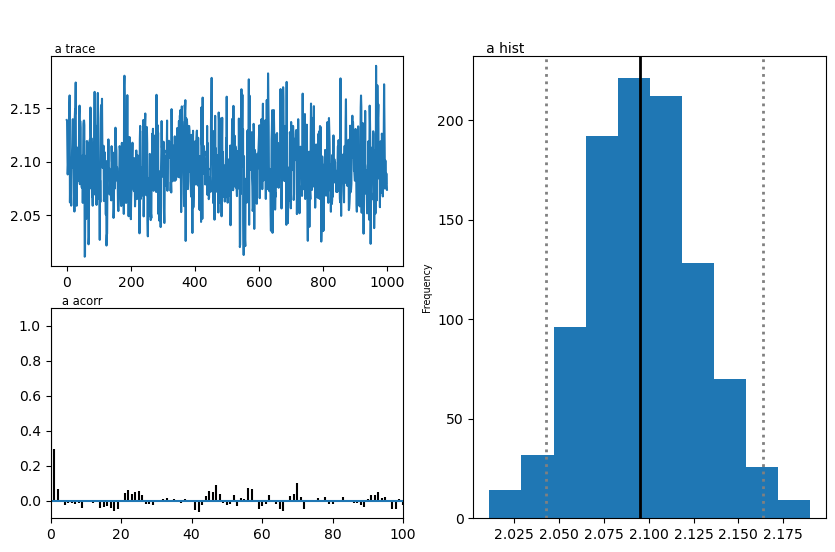

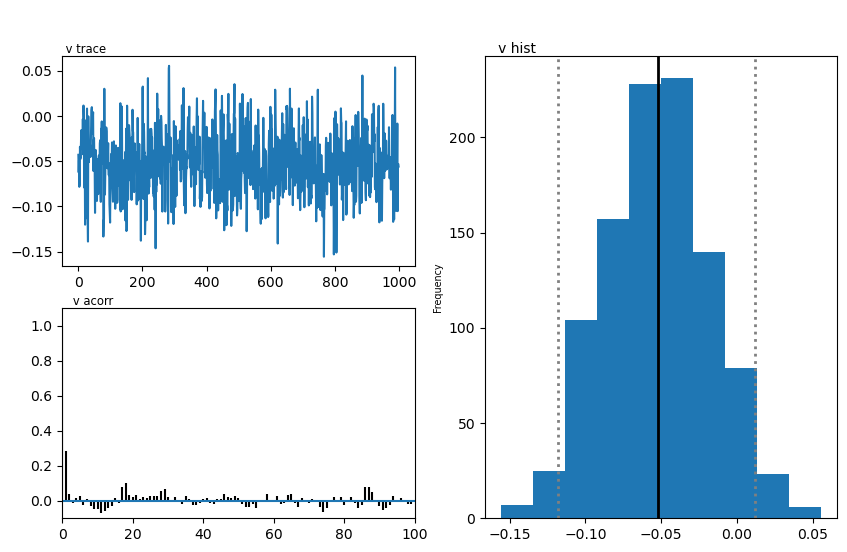

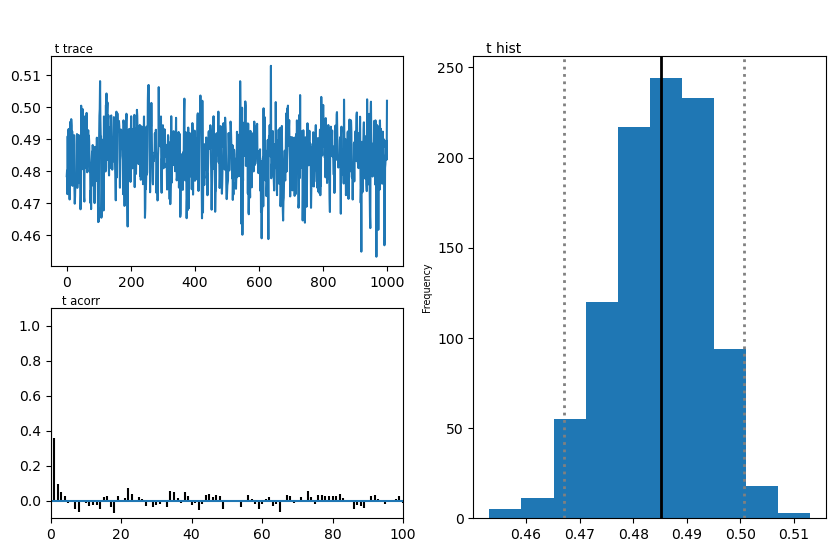

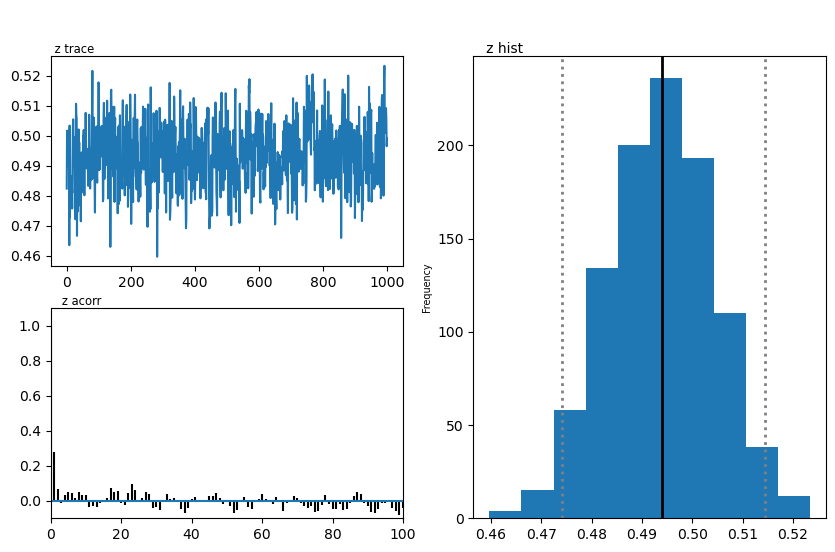

In [25]:
# Plot the traces
hddm_models[0].plot_posteriors()
plt.show()

#### Other Plots

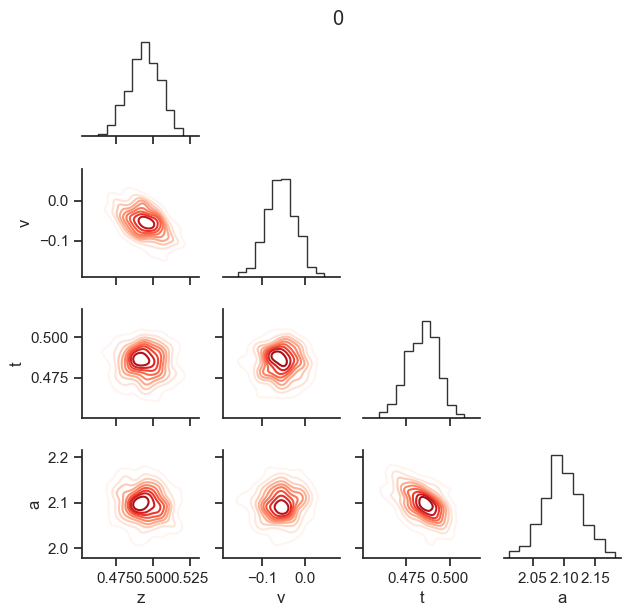

In [26]:
# Posterior Predictive Plots
hddm.plotting.plot_posterior_pair(
    hddm_models[0], parameter_recovery_mode=False, samples=500, figsize=(6, 6)
)

tracename: 
v
tracename: 
a
tracename: 
z
tracename: 
t


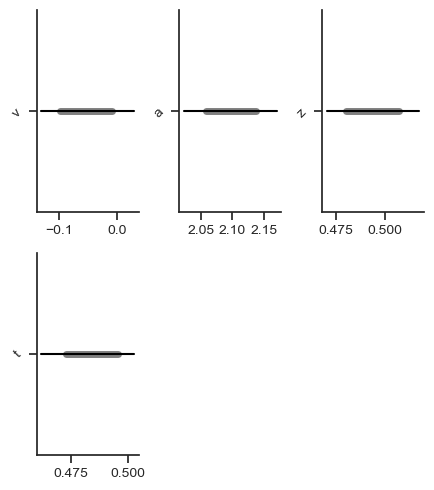

In [27]:
# Caterpillar plots
hddm.plotting.plot_caterpillar(
    hddm_model=hddm_models[0],
    ground_truth_parameter_dict=None,
    figsize=(5, 5),
    columns=3,
)

#### Posterior Predictives

##### Access via plotting: `plot_posterior_predictive()`

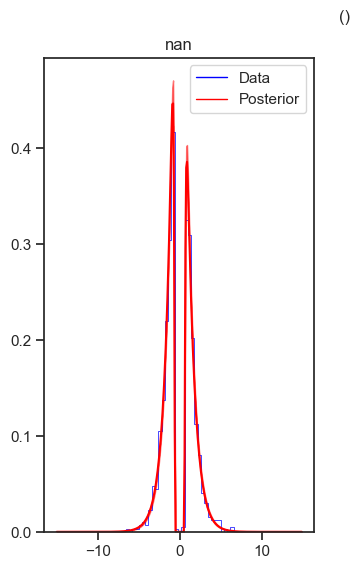

In [28]:
# Posterior Predictive
# FIX: IMPROVE LABELING
hddm.plotting.plot_posterior_predictive(
    model=hddm_models[0],
    columns=2,  # groupby = ['subj_idx'],
    figsize=(8, 6),
    value_range=np.arange(-15, 15, 0.1),
    parameter_recovery_mode=True,
    **{
        "alpha": 0.01,
        "ylim": 3,
        "bin_size": 0.4,
        "add_posterior_mean_rts": True,
        "add_posterior_uncertainty_rts": True,
        "samples": 200,
        "legend_fontsize": 7,
        "subplots_adjust": {"top": 0.9, "hspace": 0.3, "wspace": 0.3},
    }
)
plt.show()

##### Lower level access: `post_pred_gen()`

In [29]:
# Direct access to posterior predictives
posterior_predictive_sample = hddm.utils.post_pred_gen(
    model=hddm_models[0], samples=200, groupby=["subj_idx"], append_data=True
)

 [-----------------100%-----------------] 1 of 1 complete in 0.0 sec

In [30]:
posterior_predictive_sample

rt_sampled  response_sampled  index        rt  response    v  \
node sample                                                                     
wfpt 0      0     -0.751689                 0      0 -1.004997      -1.0  0.0   
            1     -2.213714                 0      1 -0.997997      -1.0  0.0   
            2     -1.816695                 0      2 -2.068017      -1.0  0.0   
            3     -1.463680                 0      3 -0.812999      -1.0  0.0   
            4     -2.407723                 0      4 -1.238994      -1.0  0.0   
...                     ...               ...    ...       ...       ...  ...   
     199    995   -1.102949                 0    995  1.162995       1.0  0.0   
            996   -1.006951                 0    996 -0.992997      -1.0  0.0   
            997   -2.079972                 0    997  0.748000       1.0  0.0   
            998    0.727954                 1    998 -1.385992      -1.0  0.0   
            999   -1.325946                 0    999  0.880999       1.0  0.0   

                   a    z    t subj_idx  
node sample                              
wfpt 0      0    2.0  0.5  0.5      0.0  
            1    2.0  0.5  0.5      0.0  
            2    2.0  0.5  0.5      0.0  
            3    2.0  0.5  0.5      0.0  
            4    2.0  0.5  0.5      0.0  
...              ...  ...  ...      ...  
     199    995  2.0  0.5  0.5      0.0  
            996  2.0  0.5  0.5      0.0  
            997  2.0  0.5  0.5      0.0  
            998  2.0  0.5  0.5      0.0  
            999  2.0  0.5  0.5      0.0  

[200000 rows x 10 columns]

From here we can compute any quantity we want, comparing any aspect of our original dataset with the synthetic data we can generate via the posterior predictives.

##### Lowest level access: `simulator()`

Using the simulator function gives you the greates amount of flexibility. Just take posterior samples from the traces and use them as parameter (`theta`) inputs to the simulator function directly. There is essentially nothing you shouldn't be able to do.

### More Complex Models

#### Condition / Regression, simplest case

We show how to replicate an analysis using the basic `HDDM()` class, with the `HDDMRegressor()` class.

In [31]:
# Simulate some data
model = "ddm_hddm_base"
n_samples = 1000

data, parameter_dict = simulator_h_c(
    n_subjects=1,
    n_trials_per_subject=n_samples,
    model=model,
    p_outlier=0.00,
    conditions={"my_condition": ["high", "low"]},
    depends_on={"v": ["my_condition"]},
    regression_models=None,
    regression_covariates=None,
    group_only_regressors=False,
    group_only=None,
    fixed_at_default=None,
)

data_new = deepcopy(data)
data_new["my_condition_reg"] = 0
data_new.loc[data_new["my_condition"] == "high", "my_condition_reg"] = 1

data_new

,rt,response,subj_idx,my_condition,v,a,z,t,my_condition_reg
0,7.049264,0.0,0,high,-0.356632,4.13145,0.580191,1.702469,1
1,3.987486,0.0,0,high,-0.356632,4.13145,0.580191,1.702469,1
2,10.385347,1.0,0,high,-0.356632,4.13145,0.580191,1.702469,1
3,4.340460,0.0,0,high,-0.356632,4.13145,0.580191,1.702469,1
4,6.496305,0.0,0,high,-0.356632,4.13145,0.580191,1.702469,1
...,...,...,...,...,...,...,...,...,...
1995,2.494462,0.0,0,low,-2.165628,4.13145,0.580191,1.702469,0
1996,2.534462,0.0,0,low,-2.165628,4.13145,0.580191,1.702469,0
1997,2.264465,0.0,0,low,-2.165628,4.13145,0.580191,1.702469,0
1998,2.854467,0.0,0,low,-2.165628,4.13145,0.580191,1.702469,0


##### Using `HDDM()` and `depends_on`

In [33]:
hddm_models_condition = []

for i in range(n_models):
    hddm_models_condition.append(
        hddm.HDDM(
            data_new,
            informative=True,
            is_group_model=False,
            depends_on={"v": "my_condition"},
            include=["v", "a", "z", "t"],
            p_outlier=0,
        )
    )

# Sample
nmcmc = 2000
for i in range(1):
    print(i)
    hddm_models_condition[i].sample(nmcmc, burn=1000)

No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 69.8 sec

In [34]:
hddm_models_condition[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,4.113655,0.060311,4.007043,4.073393,4.110084,4.153248,4.238106,0.003601
v(high),-0.32913,0.020014,-0.367812,-0.342413,-0.329411,-0.316262,-0.289232,0.000989
v(low),-2.137678,0.044588,-2.227869,-2.165996,-2.136578,-2.108074,-2.051395,0.002409
t,1.721661,0.018831,1.685962,1.707596,1.722271,1.73501,1.758521,0.001325
z,0.558375,0.010421,0.537503,0.551727,0.558491,0.565858,0.578013,0.000683


##### Using `HDDMRegressor()`

In [35]:
hddm_models_reg = []


def identity_link(x):
    return x


reg_models = [{"model": "v ~ 1 + my_condition_reg", "link_func": identity_link}]

for i in range(n_models):
    hddm_models_reg.append(
        hddm.HDDMRegressor(
            data_new,
            reg_models,
            informative=True,
            is_group_model=False,
            include=["v", "a", "t", "z"],
            p_outlier=0,
        )
    )

# Sample
nmcmc = 2000
for i in range(n_models):
    print(i)
    hddm_models_reg[i].sample(nmcmc, burn=1000)

No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 138.7 sec1
 [-----------------100%-----------------] 2000 of 2000 complete in 114.1 sec

In [36]:
hddm_models_reg[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,4.117542,0.062469,3.991596,4.079858,4.119159,4.157671,4.23758,0.00354
t,1.718996,0.019105,1.681989,1.705641,1.718617,1.73227,1.75525,0.001244
z,0.559359,0.010333,0.538583,0.552534,0.559771,0.566213,0.579105,0.000709
v_Intercept,-2.137995,0.046484,-2.226494,-2.170064,-2.138143,-2.10573,-2.04313,0.003936
v_my_condition_reg,1.807836,0.044491,1.716766,1.778369,1.80801,1.838655,1.892908,0.003667


#### Condition / Regression, hierarchical

Replicating the analysis above, but this time using a hierarchical model.

In [37]:
# Simulate some data
model = "ddm_hddm_base"
n_samples = 200

data, parameter_dict = simulator_h_c(
    n_subjects=10,
    n_trials_per_subject=n_samples,
    model=model,
    p_outlier=0.00,
    conditions={"my_condition": ["high", "low"]},
    depends_on={"v": ["my_condition"]},
    regression_models=None,
    regression_covariates=None,
    group_only_regressors=False,
    group_only=None,
    fixed_at_default=None,
)

data_new
data_new = deepcopy(data)

data_new["my_condition_reg"] = 0
data_new.loc[data_new["my_condition"] == "high", "my_condition_reg"] = 1

##### Using `HDDM()` and `depends_on`

In [39]:
# Define the HDDM model
hddm_models_group_condition = []

for i in range(n_models):
    hddm_models_group_condition.append(
        hddm.HDDM(
            data_new,
            informative=True,
            is_group_model=True,
            depends_on={"v": "my_condition"},
            include=["v", "a", "z", "t"],
            p_outlier=0,
        )
    )

# Sample
nmcmc = 2000
for i in range(1):
    print(i)
    hddm_models_group_condition[i].sample(nmcmc, burn=1000)

No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 404.5 sec

In [40]:
hddm_models_group_condition[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,0.992322,0.162465,0.726933,0.888133,0.969025,1.081929,1.356581,0.00892
a_std,0.479292,0.175739,0.264594,0.359975,0.440031,0.544133,0.987413,0.00987
a_subj.0,0.754126,0.019615,0.71519,0.741662,0.752973,0.767971,0.793827,0.000821
a_subj.1,1.187689,0.030408,1.127662,1.165985,1.18894,1.208663,1.249407,0.001342
a_subj.2,0.986146,0.028002,0.929371,0.967481,0.986614,1.005247,1.039542,0.001306
a_subj.3,0.849772,0.022941,0.807387,0.833865,0.848167,0.866022,0.895378,0.001013
a_subj.4,0.852587,0.022515,0.810993,0.836551,0.852403,0.867418,0.89827,0.000936
a_subj.5,0.255972,0.006265,0.243915,0.251871,0.256134,0.260136,0.268621,0.000249
a_subj.6,0.861594,0.024355,0.814351,0.845551,0.861699,0.877971,0.910797,0.001159
a_subj.7,0.869047,0.021844,0.828341,0.854532,0.86734,0.883431,0.914712,0.000953


##### Using `HDDMRegressor()`

In [41]:
hddm_models_group_reg = []


def identity_link(x):
    return x


reg_models = [{"model": "v ~ 1 + my_condition_reg", "link_func": identity_link}]

for i in range(n_models):
    hddm_models_group_reg.append(
        hddm.HDDMRegressor(
            data_new,
            reg_models,
            informative=True,
            is_group_model=True,
            group_only_regressors=False,
            include=["v", "a", "z", "t"],
            p_outlier=0,
        )
    )

# Sample
nmcmc = 2000
for i in range(n_models):
    print(i)
    hddm_models_group_reg[i].sample(nmcmc, burn=1000)

No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2001 of 2000 complete in 1097.9 sec1
 [-----------------100%-----------------] 2001 of 2000 complete in 816.4 sec

In [42]:
hddm_models_group_reg[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,0.979899,0.157335,0.748584,0.876946,0.959024,1.054162,1.311815,0.008575
a_std,0.46193,0.170778,0.253589,0.350913,0.423853,0.527927,0.930596,0.010485
a_subj.0,0.754792,0.019591,0.719274,0.74053,0.754511,0.767652,0.797013,0.000781
a_subj.1,1.186801,0.032068,1.127424,1.16474,1.185715,1.20769,1.252286,0.001459
a_subj.2,0.984794,0.027371,0.930539,0.966547,0.984786,1.004296,1.039688,0.001087
a_subj.3,0.852952,0.023745,0.807877,0.835383,0.854175,0.870471,0.896436,0.001074
a_subj.4,0.852153,0.022061,0.811592,0.836282,0.85154,0.867075,0.895638,0.0009
a_subj.5,0.255451,0.006012,0.244435,0.251348,0.255234,0.25918,0.268033,0.000256
a_subj.6,0.860546,0.023102,0.816332,0.845144,0.860816,0.876096,0.907035,0.001035
a_subj.7,0.868406,0.022665,0.824938,0.85218,0.868198,0.883496,0.916094,0.000975


#### Regression + *depends_on*

In [43]:
# Simulate some data
model = "ddm_hddm_base"
n_samples = 200

data, parameter_dict = simulator_h_c(
    n_subjects=10,
    n_trials_per_subject=n_samples,
    model=model,
    p_outlier=0.00,
    conditions={"my_condition": ["high", "low"]},
    depends_on={"v": ["my_condition"]},
    regression_models=None,
    regression_covariates=None,
    group_only_regressors=False,
    group_only=None,
    fixed_at_default=None,
)

data_new = deepcopy(data)
data_new["my_condition_reg"] = 0
data_new.loc[data["my_condition"] == "high", "my_condition_reg"] = 1
data_new["randcol"] = np.random.uniform(low=-1, high=1, size=data_new.shape[0])

In [44]:
parameter_dict

{'z': 0.5908694905479872,
 'z_std': 0.05841432353345733,
 'a': 2.8462292424112334,
 'a_std': 0.4737361644173384,
 't': 1.636870513835886,
 't_std': 0.016405750830200613,
 'v(high)': -1.8846064812128618,
 'v(low)': 2.134713435020661,
 'v_std': 0.08762170340692278,
 'z_subj.0': 0.5064428114134574,
 'a_subj.0': 3.0709551509801605,
 't_subj.0': 1.6415888992423575,
 'v_subj(high).0': -1.7865297359499341,
 'z_subj.1': 0.4649051477142965,
 'a_subj.1': 3.3983638177278914,
 't_subj.1': 1.6408223809114115,
 'v_subj(high).1': -1.995621356778327,
 'z_subj.2': 0.5252462562085992,
 'a_subj.2': 3.1056193248757116,
 't_subj.2': 1.646923228148418,
 'v_subj(high).2': -1.832008254679154,
 'z_subj.3': 0.5493734288630902,
 'a_subj.3': 3.1486837753440367,
 't_subj.3': 1.6298920039096065,
 'v_subj(high).3': -1.905966366325631,
 'z_subj.4': 0.5366140696909004,
 'a_subj.4': 2.679292457679929,
 't_subj.4': 1.6393145184868347,
 'v_subj(high).4': -1.8359282983554415,
 'z_subj.5': 0.5601118003081349,
 'a_subj.5': 

In [45]:
hddm_models_group_reg_depends = []


def identity_link(x):
    return x


reg_models = [{"model": "v ~ 1 + randcol", "link_func": identity_link}]

for i in range(n_models):
    hddm_models_group_reg_depends.append(
        hddm.HDDMRegressor(
            data_new,
            reg_models,
            depends_on={"v": ["my_condition"]},
            informative=True,
            is_group_model=True,
            std_depends=True,
            group_only_regressors=False,
            include=["v", "a", "z", "t"],
            p_outlier=0,
        )
    )

# Sample
nmcmc = 2000
for i in range(n_models):
    print(i)
    hddm_models_group_reg_depends[i].sample(nmcmc, burn=1000)

No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 1016.8 sec1
 [-----------------100%-----------------] 2000 of 2000 complete in 782.2 sec

In [52]:
hddm_models_group_reg_depends[0].gen_stats()[25:50]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
z_std,0.149831,0.02301,0.108674,0.133286,0.148719,0.165521,0.198529,0.000997
z_subj.0,0.515349,0.01346,0.489155,0.506382,0.515394,0.524261,0.540636,0.000602
z_subj.1,0.465093,0.014649,0.438685,0.454764,0.464928,0.475174,0.493847,0.000788
z_subj.2,0.526775,0.013571,0.497615,0.517695,0.527443,0.536549,0.551951,0.000726
z_subj.3,0.545035,0.013769,0.519178,0.536016,0.544688,0.554478,0.5732,0.000691
z_subj.4,0.526629,0.013767,0.49775,0.517467,0.526199,0.536063,0.554221,0.000643
z_subj.5,0.557127,0.014653,0.524782,0.547921,0.55711,0.566938,0.58437,0.000808
z_subj.6,0.503098,0.013541,0.477167,0.494025,0.503112,0.51188,0.532034,0.000713
z_subj.7,0.473114,0.014068,0.446153,0.463843,0.472419,0.483024,0.501168,0.00073
z_subj.8,0.485062,0.014241,0.456993,0.475948,0.485222,0.494706,0.513391,0.000777


### Link Functions

In [53]:
# Simulate some data
model = "ddm_hddm_base"
n_samples = 1000

data, parameter_dict = simulator_h_c(
    n_subjects=1,
    n_trials_per_subject=n_samples,
    model=model,
    p_outlier=0.00,
    conditions=None,
    depends_on=None,
    regression_models=None,
    regression_covariates=None,
    group_only_regressors=False,
    group_only=None,
    fixed_at_default=None,
)

In [54]:
parameter_dict

{'z': 0.6154312864537118,
 'v': 0.5083726853982586,
 't': 1.2055509268384164,
 'a': 1.954380539357642}

##### SOME NOTES:

In principle you are free to choose link function as you please. 

The general model you will fit is of the following form (take the drift parameter as an example):

$$ \hat{v} = link(\mathbf{X} \beta) $$

Using the **identity link** leaves us with,

$$ \hat{v} = \mathbf{X} \beta $$

Using the **logistic link** leave us with,

$$ \hat{v} = \frac{1}{1 + \exp( - \mathbf{X} \beta)} $$

The **identity function** will most often be the right choice.

#### Example 1: Identity Link on z

In [55]:
def identity_link(x):
    return x


def logit_link(x):
    return 1 / (1 + np.exp(-x))


reg_models = [
    {"model": "z ~ 1", "link_func": identity_link},
    {"model": "v ~ 1", "link_func": identity_link},
]

hddm_models_link_id = []
n_models = 1

for i in range(n_models):
    hddm_models_link_id.append(
        hddm.HDDMRegressor(
            data,
            reg_models,
            informative=True,
            is_group_model=False,
            group_only_regressors=True,
            include=["v", "a", "z", "t"],
            p_outlier=0,
        )
    )

# Sample
nmcmc = 1500
for i in range(1):
    print(i)
    hddm_models_link_id[i].sample(nmcmc, burn=500)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 1500 of 1500 complete in 47.1 sec

In [50]:
hddm_models_link_id[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,4.909676,0.32413,4.370016,4.64293,4.90955,5.108711,5.626281,0.029705
t,1.370789,0.0515,1.255865,1.336507,1.375113,1.409246,1.459022,0.004458
z_Intercept,0.528905,0.031882,0.468648,0.506491,0.526541,0.549243,0.593577,0.002954
v_Intercept,1.265397,0.050028,1.173632,1.227622,1.263576,1.301017,1.365643,0.003991


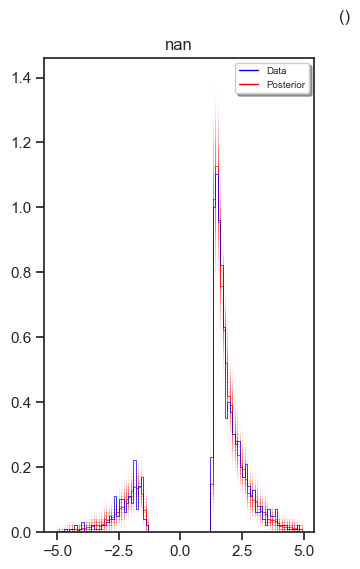

In [56]:
# Posterior Predictive
hddm.plotting.plot_posterior_predictive(
    model=hddm_models_link_id[0],
    columns=2,  # groupby = ['subj_idx'],
    figsize=(8, 6),
    value_range=np.arange(-5, 5, 0.05),
    parameter_recovery_mode=False,
    required_method="random",
    plot_func=hddm.plotting._plot_func_posterior_node_from_sim,
    **{
        "alpha": 0.01,
        "ylim": 3,
        "bin_size": 0.1,
        "add_posterior_mean_rts": True,
        "add_posterior_uncertainty_rts": True,
        "plot_likelihood_raw": False,
        "samples": 200,
        "legend_fontsize": 7,
        "subplots_adjust": {"top": 0.9, "hspace": 0.3, "wspace": 0.3},
        "posterior_uncertainty_color": "red",
    }
)

#### Example 2: Logit link on z

In [57]:
def identity_link(x):
    return x


def logit_link(x):
    return 1 / (1 + np.exp(-x))


reg_models = [
    {"model": "z ~ 1", "link_func": logit_link},
    {"model": "v ~ 1", "link_func": identity_link},
]

hddm_models_link_logit = []
n_models = 1

for i in range(n_models):
    hddm_models_link_logit.append(
        hddm.HDDMRegressor(
            data,
            reg_models,
            informative=True,
            is_group_model=False,
            group_only_regressors=True,
            include=["v", "a", "z", "t"],
            p_outlier=0,
        )
    )

# Sample
nmcmc = 1500
for i in range(1):
    print(i)
    hddm_models_link_logit[i].sample(nmcmc, burn=500)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 1500 of 1500 complete in 46.4 sec

In [58]:
hddm_models_link_id[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.997498,0.034517,1.931216,1.973821,1.997247,2.020934,2.067506,0.001364
t,1.210438,0.00742,1.194441,1.206324,1.210842,1.21552,1.224013,0.000434
z_Intercept,0.624583,0.012586,0.597178,0.615603,0.624944,0.63359,0.647763,0.000777
v_Intercept,0.519173,0.046946,0.431535,0.487425,0.517122,0.551806,0.615781,0.002395


##### NOTES:

When the **logit link** is used (any link), we have to transform the **z_Intercept** parameter.

In [59]:
z_intercept = hddm_models_link_id[0].gen_stats().loc["z_Intercept", "mean"]

print("Computed z")
print(1 / (1 + np.exp(-z_intercept)))

print("Ground Truth z")
print(parameter_dict["z"])

Computed z
0.6512602414581903
Ground Truth z
0.6154312864537118


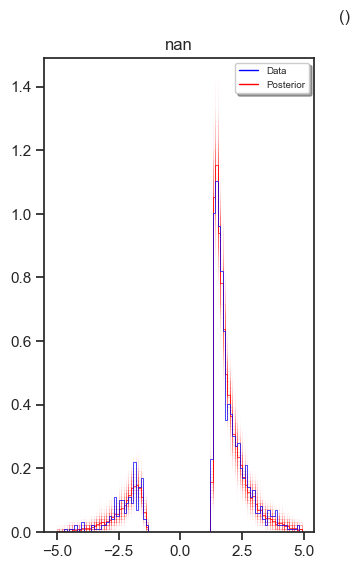

In [60]:
# Posterior Predictive
hddm.plotting.plot_posterior_predictive(
    model=hddm_models_link_id[0],
    columns=2,
    figsize=(8, 6),
    value_range=np.arange(-5, 5, 0.05),
    parameter_recovery_mode=False,
    required_method="random",
    plot_func=hddm.plotting._plot_func_posterior_node_from_sim,
    **{
        "alpha": 0.01,
        "ylim": 3,
        "bin_size": 0.1,
        "add_posterior_mean_rts": True,
        "add_posterior_uncertainty_rts": True,
        "plot_likelihood_raw": False,
        "samples": 200,
        "legend_fontsize": 7,
        "subplots_adjust": {"top": 0.9, "hspace": 0.3, "wspace": 0.3},
        "posterior_uncertainty_color": "red",
    }
)

##### NOTES:

If we *do not* use the *identity* link on a parameter, the *prior* on it's *intercept* will default to a *normal distribution*.

If we *do* use the *identity* link on a parameter, the *prior* will be the same as the *informative* prior chosen when estimating this parameter *without a regression model*.

#### Example 3: Less Standard use case - Stimulus Coding 

We will refer to the slides to discuss stimulus coding, before proceeding to the example.

In [61]:
# Simulate some StimCoding Data
n_samples = 1000
v = np.concatenate([np.ones(500), -np.ones(500)])
a = 3
z = 0.5
t = 1

theta = np.zeros((n_samples, 4))
theta[:, 0] = v
theta[:, 1] = a
theta[:, 2] = z
theta[:, 3] = t

In [62]:
sim_out = hddm.simulators.simulator(
    theta=theta, model="ddm_hddm_base", n_samples=1, max_t=40
)

data = pd.DataFrame(
    np.hstack([sim_out[0], sim_out[1], theta]),
    columns=["rt", "response", "v", "a", "z", "t"],
)
data["stim"] = 2
data.loc[data["v"] == -1.0, "stim"] = 1

##### VIA STIMCODING

In [63]:
hddm_models_stim = []
n_models = 1

for i in range(n_models):
    hddm_models_stim.append(
        hddm.HDDMStimCoding(
            data,
            split_param="v",
            stim_col="stim",
            informative=True,
            is_group_model=False,
            include=["v", "a", "t", "z"],
            p_outlier=0,
        )
    )

# Sample
nmcmc = 1500
for i in range(1):
    print(i)
    hddm_models_stim[i].sample(nmcmc, burn=500)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 1500 of 1500 complete in 24.1 sec----------      31%                  ] 470 of 1500 complete in 7.6 sec

In [64]:
hddm_models_stim[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,3.050481,0.07143,2.919683,2.99879,3.0508,3.097084,3.193658,0.003983
v,1.047365,0.030412,0.989256,1.02644,1.046312,1.069873,1.102508,0.00137
t,0.993757,0.016443,0.960173,0.982792,0.993751,1.005586,1.023616,0.000839
z,0.501646,0.008078,0.486367,0.496445,0.50116,0.507025,0.518637,0.00028


##### VIA REGRESSION

In [65]:
from patsy import dmatrix


def identity_link(x):
    return x


def logit_link(x):
    return 1 / (1 + np.exp(-x))


def stim_coding(x, data=data):
    stim = np.squeeze(
        (np.asarray(dmatrix("0 + C(s,[[-1],[1]])", {"s": data.stim.loc[x.index]})))
    )
    return x * stim


reg_models = [
    {"model": "z ~ 1", "link_func": identity_link},
    {"model": "v ~ 1", "link_func": stim_coding},
]

hddm_models_stim_reg = []
n_models = 1

for i in range(n_models):
    hddm_models_stim_reg.append(
        hddm.HDDMRegressor(
            data,
            reg_models,
            informative=True,
            is_group_model=False,
            group_only_regressors=True,
            include=["v", "a", "t", "z"],
            p_outlier=0,
        )
    )

# Sample
nmcmc = 2000
for i in range(1):
    print(i)
    hddm_models_stim_reg[i].sample(nmcmc, burn=1000)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 114.0 sec

In [66]:
hddm_models_stim_reg[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,3.054358,0.07563,2.911396,3.000785,3.054716,3.106933,3.203144,0.004325
t,0.993407,0.017252,0.956947,0.98271,0.994297,1.005285,1.025845,0.000923
z_Intercept,0.502034,0.008245,0.48624,0.496491,0.502031,0.507322,0.51889,0.000273
v_Intercept,1.049736,0.032456,0.986095,1.028932,1.050385,1.071251,1.110863,0.00133


##### VIA REGRESSION - ALTERNATIVE VERSION (VIA COLUMN TRANSFORM)

In [67]:
data["stimalt"] = 1
data.loc[data["stim"] == 2, "stimalt"] = -1

In [68]:
data

,rt,response,v,a,z,t,stim,stimalt
0,2.250002,1.0,1.0,3.0,0.5,1.0,2,-1
1,1.806993,1.0,1.0,3.0,0.5,1.0,2,-1
2,2.374008,1.0,1.0,3.0,0.5,1.0,2,-1
3,2.006991,1.0,1.0,3.0,0.5,1.0,2,-1
4,1.939991,1.0,1.0,3.0,0.5,1.0,2,-1
...,...,...,...,...,...,...,...,...
995,2.500014,-1.0,-1.0,3.0,0.5,1.0,1,1
996,1.833993,-1.0,-1.0,3.0,0.5,1.0,1,1
997,1.875992,-1.0,-1.0,3.0,0.5,1.0,1,1
998,2.031992,-1.0,-1.0,3.0,0.5,1.0,1,1


In [128]:
from patsy import dmatrix


def identity_link(x):
    return x


def logit_link(x):
    return 1 / (1 + np.exp(-x))


def stim_coding(x, data=data):
    stim = np.squeeze(
        (np.asarray(dmatrix("0 + C(s,[[-1],[1]])", {"s": data.stim.loc[x.index]})))
    )
    return x * stim


def stim_coding_alt(x, data=data):
    return x * data.stimalt.loc[x.index].values


reg_models = [
    {"model": "z ~ 1", "link_func": identity_link},
    {"model": "v ~ 0 + stimalt", "link_func": stim_coding_alt},
]

hddm_models_stim_reg_alt = []
n_models = 1

for i in range(n_models):
    hddm_models_stim_reg_alt.append(
        hddm.HDDMRegressor(
            data,
            reg_models,
            informative=True,
            is_group_model=False,
            group_only_regressors=True,
            include=["v", "a", "t", "z"],
            p_outlier=0,
        )
    )

# Sample
nmcmc = 1000
for i in range(1):
    print(i)
    hddm_models_stim_reg_alt[i].sample(nmcmc, burn=500)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 1000 of 1000 complete in 34.5 sec

In [129]:
hddm_models_stim_reg_alt[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.275273,0.033777,2.20881,2.251518,2.275784,2.300361,2.34066,0.001857
t,1.096356,0.010503,1.07462,1.089121,1.097411,1.104284,1.115353,0.000571
z_Intercept,0.492462,0.010664,0.472059,0.485721,0.491887,0.499742,0.513756,0.000633
v_stimalt,0.018102,0.034652,-0.054564,-0.003809,0.020024,0.039782,0.084198,0.001998


### Interactions (Continuous Covariates)

In [182]:
# Make data
n_trials = 1000

beta_v_intercept = 1
beta_v_cov_1 = 1
beta_v_cov_2 = -1
beta_v_interaction = 0.5
cov_1 = np.random.uniform(low=-1, high=1, size=n_trials)
cov_2 = np.random.uniform(low=-1, high=1, size=n_trials)

v = (
    beta_v_intercept
    + beta_v_cov_1 * cov_1
    + beta_v_cov_2 * cov_2
    + beta_v_interaction * cov_1 * cov_2
)
a = 3
t = 1
z = 0.4

theta = np.zeros((n_trials, 4))
theta[:, 0] = v
theta[:, 1] = a
theta[:, 2] = z
theta[:, 3] = t

In [144]:
sim_out = hddm.simulators.simulator(
    theta=theta, model="ddm_hddm_base", n_samples=1, max_t=40
)

data = pd.DataFrame(
    np.hstack([sim_out[0], sim_out[1], theta]),
    columns=["rt", "response", "v", "a", "z", "t"],
)
data["cov_1"] = cov_1
data["cov_2"] = cov_2

In [145]:
data

,rt,response,v,a,z,t,cov_1,cov_2
0,3.177025,1.0,0.868726,3.0,0.4,1.0,-0.539517,-0.321512
1,1.721994,1.0,0.842933,3.0,0.4,1.0,0.435072,0.756762
2,1.522997,1.0,2.273635,3.0,0.4,1.0,0.698202,-0.884059
3,2.206000,1.0,1.455309,3.0,0.4,1.0,-0.333299,-0.675959
4,1.682995,1.0,1.754868,3.0,0.4,1.0,-0.146508,-0.839854
...,...,...,...,...,...,...,...,...
995,1.622996,0.0,-0.205304,3.0,0.4,1.0,-0.278095,0.814022
996,2.473013,1.0,0.621518,3.0,0.4,1.0,-0.101141,0.263991
997,1.402998,1.0,1.659651,3.0,0.4,1.0,0.993290,0.662830
998,2.552016,1.0,1.749547,3.0,0.4,1.0,0.983792,0.461018


In [146]:
# Run Model
def identity_link(x):
    return x


def logit_link(x):
    return 1 / (1 + np.exp(-x))


reg_models = [
    {"model": "z ~ 1", "link_func": identity_link},
    {"model": "v ~ 1 + cov_1 * cov_2", "link_func": identity_link},
]

hddm_models_reg_interact = []
n_models = 1

for i in range(n_models):
    hddm_models_reg_interact.append(
        hddm.HDDMRegressor(
            data,
            reg_models,
            informative=True,
            is_group_model=False,
            group_only_regressors=True,
            include=["v", "a", "t", "z"],
            p_outlier=0,
        )
    )

# Sample
nmcmc = 2000
for i in range(1):
    print(i)
    hddm_models_reg_interact[i].sample(nmcmc, burn=1000)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 128.2 sec

In [147]:
hddm_models_reg_interact[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,3.05356,0.061154,2.94053,3.013907,3.053218,3.094195,3.174831,0.003217
t,0.979239,0.015832,0.947269,0.967998,0.980263,0.990506,1.008643,0.00079
z_Intercept,0.385072,0.010805,0.36276,0.378506,0.385366,0.392151,0.40637,0.000472
v_Intercept,0.992757,0.036641,0.921336,0.96781,0.992819,1.01786,1.06565,0.001879
v_cov_1,0.965131,0.048614,0.868896,0.932833,0.965775,1.00036,1.055826,0.002069
v_cov_2,-0.982753,0.050947,-1.082958,-1.017807,-0.982696,-0.947519,-0.88273,0.002077
v_cov_1:cov_2,0.459941,0.091786,0.280086,0.399174,0.46033,0.52191,0.635334,0.002942


##### NOTES:

A note on the interpretation of the **beta coefficients**. 
Let's say we as whether our interaction term is "*significantly*" different from 0.

We can plot the trace and signify e.g. it's $5th$ percentile. 
If the $5th$ percentile is above 0 (or the $95th$ percentile below 0) we can conclude with some confidence that 
there is a **positive interaction** (negative interaction) between *cov_1* and *cov_2*.


(0.0, 1.0)

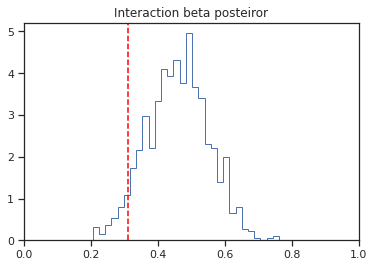

In [148]:
# Bayesian 'hypothesis test' checking whether the interaction is 'significant'

interaction_trace = hddm_models_reg_interact[0].get_traces()["v_cov_1:cov_2"].values
interaction_trace_sorted = np.sort(interaction_trace)

percentile = 0.05
plt.hist(interaction_trace, bins=30, histtype="step", density=True)
plt.axvline(
    x=interaction_trace_sorted[int(np.floor(percentile * interaction_trace.shape[0]))],
    color="red",
    linestyle="dashed",
)
plt.title("Interaction beta posteiror")
plt.xlim((0, 1))

### Interactions (Categorical Covariates)

This example comes closest to **ANOVA** style analysis.

In [149]:
# Make data
n_trials = 1000

beta_v_intercept = 1
beta_v_cov_1 = 1
beta_v_cov_2 = -1
beta_v_interaction = 0.5
cov_1 = np.concatenate(
    [np.ones(500), np.zeros(500)]
)  # np.random.uniform(low = -1, high = 1, size = n_trials)
cov_2 = np.concatenate(
    [np.ones(250), np.zeros(250), np.ones(250), np.zeros(250)]
)  # np.random.uniform(low = -1, high = 1, size = n_trials)
v = (
    beta_v_intercept
    + beta_v_cov_1 * cov_1
    + beta_v_cov_2 * cov_2
    + beta_v_interaction * cov_1 * cov_2
)
a = 3
t = 1
z = 0.4

theta = np.zeros((n_trials, 4))
theta[:, 0] = v
theta[:, 1] = a
theta[:, 2] = z
theta[:, 3] = t

In [150]:
sim_out = hddm.simulators.simulator(
    theta=theta, model="ddm_hddm_base", n_samples=1, max_t=40
)

data = pd.DataFrame(
    np.hstack([sim_out[0], sim_out[1], theta]),
    columns=["rt", "response", "v", "a", "z", "t"],
)
data["cov_1"] = cov_1
data["cov_2"] = cov_2
data["cov_1"] = data["cov_1"].apply(str)
data["cov_2"] = data["cov_2"].apply(str)

In [151]:
data

,rt,response,v,a,z,t,cov_1,cov_2
0,1.806993,1.0,1.5,3.0,0.4,1.0,1.0,1.0
1,2.618020,1.0,1.5,3.0,0.4,1.0,1.0,1.0
2,1.493997,1.0,1.5,3.0,0.4,1.0,1.0,1.0
3,2.094995,1.0,1.5,3.0,0.4,1.0,1.0,1.0
4,1.716994,1.0,1.5,3.0,0.4,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
995,3.139027,1.0,1.0,3.0,0.4,1.0,0.0,0.0
996,3.453005,1.0,1.0,3.0,0.4,1.0,0.0,0.0
997,1.460998,1.0,1.0,3.0,0.4,1.0,0.0,0.0
998,3.128028,1.0,1.0,3.0,0.4,1.0,0.0,0.0


In [152]:
# Run Model
def identity_link(x):
    return x


def logit_link(x):
    return 1 / (1 + np.exp(-x))


reg_models = [
    {"model": "z ~ 1", "link_func": identity_link},
    {"model": "v ~ 1 + cov_1 * cov_2", "link_func": identity_link},
]

hddm_models_reg_interact = []
n_models = 1

for i in range(n_models):
    hddm_models_reg_interact.append(
        hddm.HDDMRegressor(
            data,
            reg_models,
            informative=True,
            is_group_model=False,
            group_only_regressors=True,
            include=["v", "a", "t", "z"],
            p_outlier=0,
        )
    )

# Sample
nmcmc = 2000
for i in range(1):
    print(i)
    hddm_models_reg_interact[i].sample(nmcmc, burn=1000)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 122.6 sec

In [153]:
hddm_models_reg_interact[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,3.133511,0.065667,3.00346,3.08932,3.132351,3.180116,3.259844,0.003913
t,0.991305,0.017442,0.954532,0.98048,0.991255,1.003074,1.025361,0.001076
z_Intercept,0.41207,0.012066,0.388513,0.40434,0.412275,0.419599,0.43572,0.000716
v_Intercept,1.090374,0.052223,0.994351,1.054342,1.090284,1.126844,1.192983,0.003714
v_cov_1[T.1.0],0.940493,0.082819,0.783328,0.883556,0.942071,0.992947,1.112397,0.005801
v_cov_2[T.1.0],-1.090818,0.062185,-1.218202,-1.132491,-1.087307,-1.047429,-0.974007,0.004176
v_cov_1[T.1.0]:cov_2[T.1.0],0.650929,0.109233,0.436134,0.577175,0.649197,0.728338,0.856451,0.0078


### Priors

We try to illustrate the effect of choosing between *informative* and *uninformative* priors in your data analysis (and relatedly the added benefit you might expect from introducing more user side freedom on prior choice). We pick a number of different dataset-sizes (trial numbers), run inference *once with informative* and *once with uninformative* priors and then compare the posteriors for each of the parameters **\[v, a, z, t\]**.

**Spoiler-alert**:

Don't expect much !

In [154]:
# Generate some data
n_samples = 10000
parameters = hddm.model_config.model_config["ddm_hddm_base"]["params_default"]
parameters[hddm.model_config.model_config["ddm_hddm_base"]["params"].index("t")] = 0.5

theta = np.zeros((n_samples, 4))
theta[:, 0] = parameters[
    hddm.model_config.model_config["ddm_hddm_base"]["params"].index("v")
]
theta[:, 1] = parameters[
    hddm.model_config.model_config["ddm_hddm_base"]["params"].index("a")
]
theta[:, 2] = parameters[
    hddm.model_config.model_config["ddm_hddm_base"]["params"].index("z")
]
theta[:, 3] = parameters[
    hddm.model_config.model_config["ddm_hddm_base"]["params"].index("t")
]

sim_out = hddm.simulators.simulator(
    theta=parameters, model="ddm_hddm_base", n_samples=n_samples, max_t=40
)

data = pd.DataFrame(
    np.hstack([sim_out[0], sim_out[1], theta]),
    columns=["rt", "response", "v", "a", "z", "t"],
)

theta is supplied as list --> simulator assumes n_trials = 1


In [156]:
# Choose sample sizes for our model fits
sample_sizes = [32, 64, 128, 256, 512, 1024]
stats_list = []
trace_list = []

for n_samples_tmp in sample_sizes:
    print("Sample size: ", n_samples_tmp)
    data_tmp = data.sample(n_samples_tmp).reset_index(drop=True)

    # Informative -----
    hddm_model_tmp = hddm.HDDM(
        data_tmp,
        informative=True,
        is_group_model=False,
        include=["v", "a", "t", "z"],
        p_outlier=0,
    )
    hddm_model_tmp.sample(1000, burn=500)

    # Save traces
    tmp_traces = hddm_model_tmp.get_traces()
    tmp_traces["informative"] = 1
    tmp_traces["sample_size"] = n_samples_tmp
    trace_list.append(deepcopy(tmp_traces))
    # -----

    # Uninformative -----
    hddm_model_tmp = hddm.HDDM(
        data_tmp,
        informative=False,
        is_group_model=False,
        include=["v", "a", "t", "z"],
        p_outlier=0,
    )
    hddm_model_tmp.sample(1000, burn=500)

    # Save traces
    tmp_traces = hddm_model_tmp.get_traces()
    tmp_traces["informative"] = 0
    tmp_traces["sample_size"] = n_samples_tmp
    trace_list.append(deepcopy(tmp_traces))
    # -----

trace_df = pd.concat(trace_list)
trace_df["sample_size"] = trace_df["sample_size"].apply(str)

Sample size:  32
No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 7.5 secNo model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 7.4 secSample size:  64
No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 6.6 secNo model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 6.5 secSample size:  128
No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 6.4 secNo model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 6.4 secSample size:  256
No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%--------

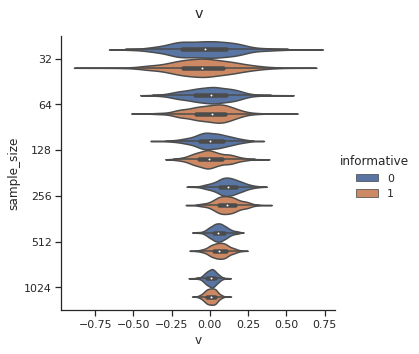

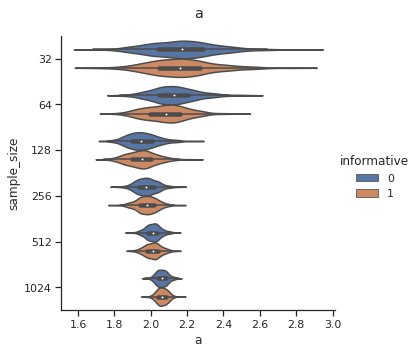

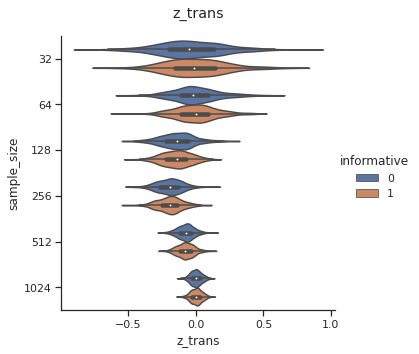

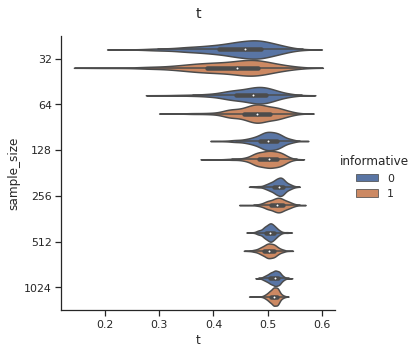

In [157]:
for param in ["v", "a", "z_trans", "t"]:
    g = sns.catplot(
        x=param,
        y="sample_size",
        hue="informative",
        kind="violin",
        data=trace_df,
        title=param,
    )
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(param)

### END